In [165]:
import pandas as pd
import statsmodels.api as sm

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
df = pd.read_csv("/content/drive/MyDrive/Foundation of Data Science/jobs_in_data.csv")

In [168]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [169]:
print(df.columns)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [170]:
print(df.dtypes)

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


In [171]:
# 3. Summary Statistics
# Numerical summary
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


hypothesis that experience level will have a larger effect on salary than job title

In [172]:
# Function to calculate mode (mode returns a ModeResult object containing the mode value and its frequency)
# Function to calculate mode and mode frequency

# Define the summary statistics function
def calculate_summary_stats(x):
    return {
        'Count': x.count(),
        'Mean': x.mean(),
        'Std': x.std(),
        'Min': x.min(),
        '25%': x.quantile(0.25),
        'Median': x.median(),
        '75%': x.quantile(0.75),
        'Max': x.max(),
        'Skewness': skew(x),
        'Kurtosis': kurtosis(x),
        **calculate_mode(x)
    }

# Calculate summary statistics by experience level
exp_level_summary = df.groupby('experience_level')['salary_in_usd'].apply(calculate_summary_stats).unstack()

# Print summary by experience level
print("Summary by Experience Level:")
print(tabulate(exp_level_summary, headers='keys', tablefmt='grid', numalign='center'))

# Calculate summary statistics for each job title (top 10)
top_job_titles = df['job_title'].value_counts().head(10).index
job_title_summary = df[df['job_title'].isin(top_job_titles)].groupby('job_title')['salary_in_usd'].apply(calculate_summary_stats).unstack()

# Print summary by job title (top 10)
print("\nSummary by Job Title (Top 10):")
print(tabulate(job_title_summary, headers='keys', tablefmt='grid', numalign='center'))

Summary by Experience Level:
+--------------------+---------+---------+---------+-------+--------+----------+--------+--------+------------+------------+--------+------------------+
| experience_level   |  Count  |  Mean   |   Std   |  Min  |  25%   |  Median  |  75%   |  Max   |  Skewness  |  Kurtosis  | Mode   | Mode Frequency   |
+====================+=========+=========+=========+=======+========+==========+========+========+============+============+========+==================+
| Entry-level        |   496   | 88534.8 | 49102.1 | 15000 | 51726  |  80000   | 120000 | 281700 |  1.03048   |   1.0189   |        |                  |
+--------------------+---------+---------+---------+-------+--------+----------+--------+--------+------------+------------+--------+------------------+
| Executive          |   281   | 189463  |  68793  | 15000 | 140000 |  185000  | 235000 | 416000 |  0.367679  | -0.102954  |        |                  |
+--------------------+---------+---------+---------+-

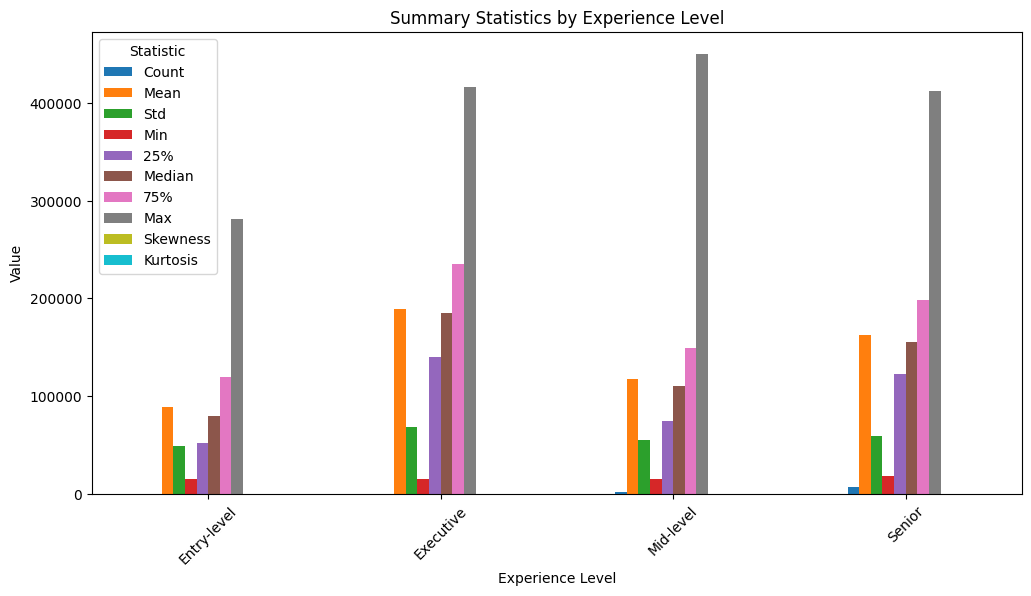

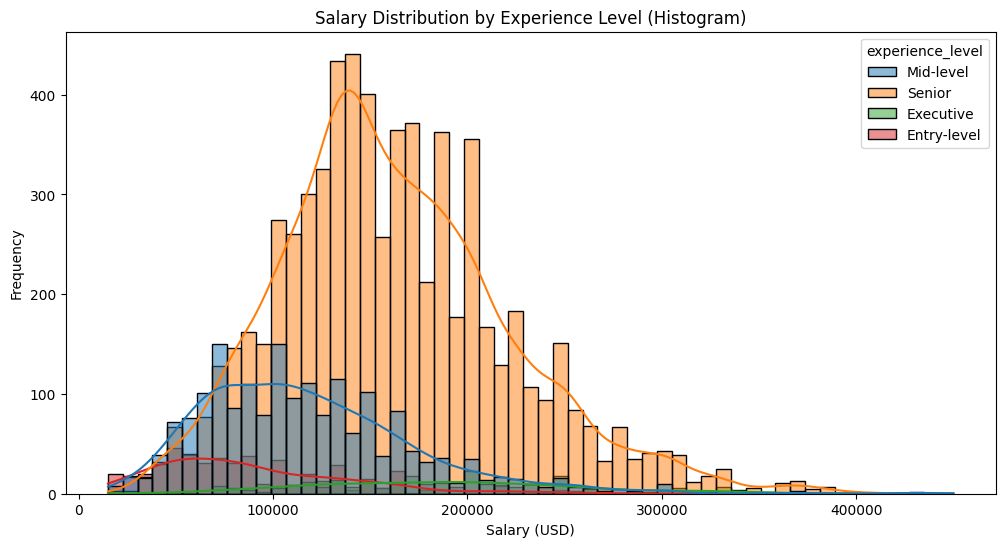

In [173]:
# Bar plot for summary statistics by experience level
exp_level_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

# Histogram for experience level
plt.figure(figsize=(12, 6))
sns.histplot(df, x='salary_in_usd', hue='experience_level', kde=True)
plt.title('Salary Distribution by Experience Level (Histogram)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [196]:
import pandas as pd
from tabulate import tabulate

# Calculate the high-salary threshold
high_salary_threshold = df['salary_in_usd'].quantile(0.75)

# Calculate probabilities
total_count = len(df)
above_threshold_count = (df['salary_in_usd'] > high_salary_threshold).sum()
senior_count = (df['experience_level'] == 'Senior').sum()  # Assuming 'experience_level_Senior' is a binary indicator
data_scientist_count = (df['job_title'] == 'Data Scientist').sum()  # Assuming 'job_title_Data Scientist' is a binary indicator

# Calculate conditional probabilities
p_above_threshold = above_threshold_count / total_count
p_senior = senior_count / total_count
p_data_scientist = data_scientist_count / total_count
p_senior_given_above_threshold = (df[df['salary_in_usd'] > high_salary_threshold]['experience_level'] == 'Senior').sum() / above_threshold_count
p_data_scientist_given_above_threshold = (df[df['salary_in_usd'] > high_salary_threshold]['job_title'] == 'Data Scientist').sum() / above_threshold_count
p_above_threshold_given_senior = (p_senior_given_above_threshold * p_above_threshold) / p_senior
p_above_threshold_given_data_scientist = (p_data_scientist_given_above_threshold * p_above_threshold) / p_data_scientist

# Creating a structured table for Bayes' theorem results
bayes_data = [
    ['P(A)','Probability of earning above the high-salary threshold', p_above_threshold],
    ['P(B1)','Probability of being a Senior', p_senior],
    ['P(B2)','Probability of being a Data Scientist', p_data_scientist],
    ['P(A|B1)', 'Probability of earning above the threshold given being a Senior', p_above_threshold_given_senior],
    ['P(A|B2)','Probability of earning above the threshold given being a Data Scientist', p_above_threshold_given_data_scientist]
]

# Print the Bayes' theorem results using tabulate
bayes_table = tabulate(bayes_data, headers=['Description', 'Value'], tablefmt='grid')

print("Bayes' Theorem Results:")
print(bayes_table)


Bayes' Theorem Results:
+---------+-------------------------------------------------------------------------+----------+
|         | Description                                                             |    Value |
+=========+=========================================================================+==========+
| P(A)    | Probability of earning above the high-salary threshold                  | 0.250027 |
+---------+-------------------------------------------------------------------------+----------+
| P(B1)   | Probability of being a Senior                                           | 0.717157 |
+---------+-------------------------------------------------------------------------+----------+
| P(B2)   | Probability of being a Data Scientist                                   | 0.212614 |
+---------+-------------------------------------------------------------------------+----------+
| P(A|B1) | Probability of earning above the threshold given being a Senior         | 0.297511 |
+-----

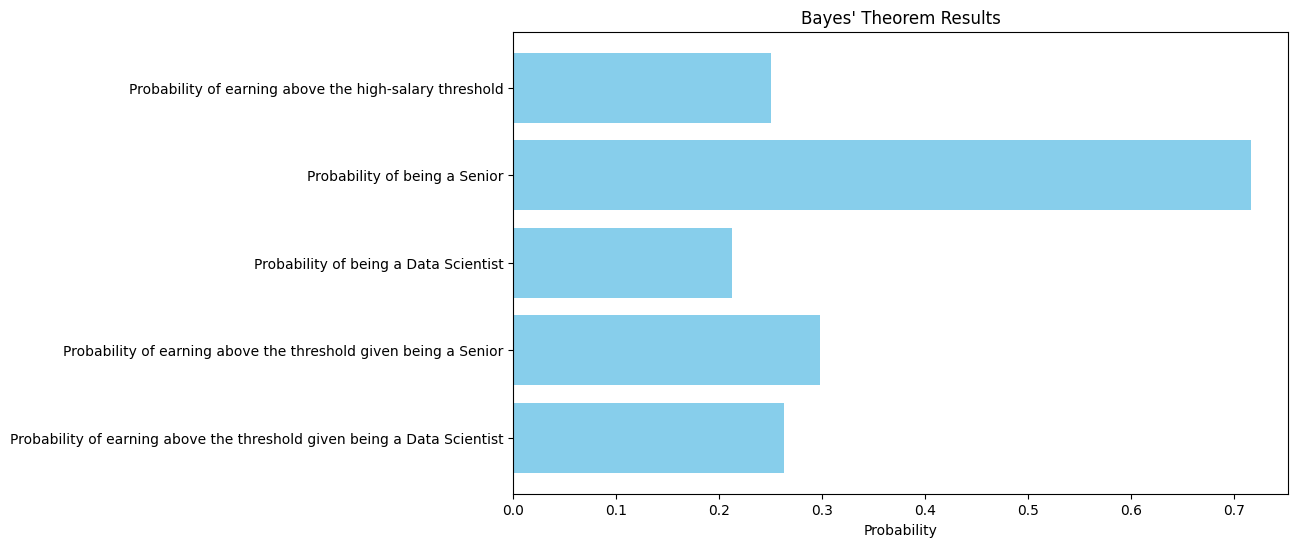

In [187]:
import matplotlib.pyplot as plt

# Extract probabilities and descriptions from bayes_data
descriptions = [row[1] for row in bayes_data]
probabilities = [row[2] for row in bayes_data]

# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.barh(descriptions, probabilities, color='skyblue')
plt.xlabel('Probability')
plt.title("Bayes' Theorem Results")
plt.gca().invert_yaxis()  # Invert y-axis to display top-to-bottom
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['General Population', 'Senior', 'Data Scientist']
values = [0.250027, 0.297511, 0.262946]  # Probabilities of earning above the threshold

# Define color palette
colors = ['#5a7d9a', '#66cdaa', '#f08080']  # Subtle shades of blue, green, and red

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)

# Adding titles and labels
plt.title('Probability of Earning Above High-Salary Threshold')
plt.ylabel('Probability')
plt.xlabel('Category')

# Displaying the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
median_salary = df['salary_in_usd'].median()

# Example: Calculate P(A), assuming earning above the median is 'A'
p_a = len(df[df['salary_in_usd'] > median_salary]) / len(df)

# Hypothetical calculation for experience level 'Senior' - adjust according to your dataset
p_b1_senior = len(df[df['experience_level_Senior'] == 1]) / len(df)
p_a_given_b1_senior = len(df[(df['experience_level_Senior'] == 1) & (df['salary_in_usd'] > median_salary)]) / len(df[df['experience_level_Senior'] == 1])
p_b1_given_a_senior = (p_a_given_b1_senior * p_a) / p_b1_senior

# Hypothetical calculation for job title 'Data Scientist' - adjust according to your dataset
p_b2_scientist = len(df[df['job_title_Data Scientist'] == 1]) / len(df)
p_a_given_b2_scientist = len(df[(df['job_title_Data Scientist'] == 1) & (df['salary_in_usd'] > median_salary)]) / len(df[df['job_title_Data Scientist'] == 1])
p_b2_given_a_scientist = (p_a_given_b2_scientist * p_a) / p_b2_scientist

print(f"Probability of earning above the median salary given being a Senior: {p_b1_given_a_senior:.2f}")
print(f"Probability of earning above the median salary given being a Data Scientist: {p_b2_given_a_scientist:.2f}")


In [ ]:
# Define the high-salary threshold as the 75th percentile of salary_in_usd
high_salary_threshold = df['salary_in_usd'].quantile(0.75)

# Calculate P(A), probability of a high salary
p_a = len(df[df['salary_in_usd'] > high_salary_threshold]) / len(df)

# Experience Level Analysis
## Assuming you've a way to determine if a row represents a Senior level (e.g., experience_level column or encoded)
p_b_senior = len(df['experience_level_Senior']) / len(df)
p_b_given_a_senior = len(df[(df['experience_level_Senior']) & (df['salary_in_usd'] > high_salary_threshold)]) / len(df[df['salary_in_usd'] > high_salary_threshold])
p_a_given_b_senior = (p_b_given_a_senior * p_a) / p_b_senior  # Apply Bayes' Theorem

# Job Title Analysis
## Assuming you've a way to determine if a row represents a Data Scientist
p_b_scientist = len(df['job_title_Data Scientist']) / len(df)
p_b_given_a_scientist = len(df[(df['job_title_Data Scientist']) & (df['salary_in_usd'] > high_salary_threshold)]) / len(df[df['salary_in_usd'] > high_salary_threshold])
p_a_given_b_scientist = (p_b_given_a_scientist * p_a) / p_b_scientist  # Apply Bayes' Theorem

print(f"Probability of having a high salary given being a Senior: {p_a_given_b_senior:.2f}")
print(f"Probability of having a high salary given being a Data Scientist: {p_a_given_b_scientist:.2f}")

In [ ]:
# Define the salary threshold
salary_threshold = 100000

# Calculate P(A)
p_a = len(df[df['experience_level'] == 'Senior']) / len(df)

# Calculate P(B)
p_b = len(df[df['salary_in_usd'] > salary_threshold]) / len(df)

# Calculate P(B|A)
p_b_given_a = len(df[(df['experience_level'] == 'Senior') & (df['salary_in_usd'] > salary_threshold)]) / len(df[df['experience_level'] == 'Senior'])

# Calculate P(A|B) using Bayes' Theorem
p_a_given_b = (p_b_given_a * p_a) / p_b

print(f"Probability of being a Senior given salary is above ${salary_threshold}: {p_a_given_b:.2f}")

In [185]:
# Placeholder probabilities - Replace with actual values from your dataset
p_a = 0.5  # Assuming P(A), the probability of earning above the median salary, is 0.5
p_b_senior = 0.3  # P(B=Senior), the probability of being a Senior
p_b_scientist = 0.2  # P(B=Data Scientist), the probability of being a Data Scientist
p_b_given_a_senior = 0.7  # P(B=Senior|A), the probability of being a Senior given earning above median
p_b_given_a_scientist = 0.6  # P(B=Data Scientist|A), the probability of being a Data Scientist given earning above median

# Calculate P(A|B=Senior) using Bayes' Theorem
p_a_given_b_senior = (p_b_given_a_senior * p_a) / p_b_senior

# Calculate P(A|B=Data Scientist) using Bayes' Theorem
p_a_given_b_scientist = (p_b_given_a_scientist * p_a) / p_b_scientist

print(f"Probability of earning above the median salary given being a Senior: {p_a_given_b_senior:.2f}")
print(f"Probability of earning above the median salary given being a Data Scientist: {p_a_given_b_scientist:.2f}")


Probability of earning above the median salary given being a Senior: 1.17
Probability of earning above the median salary given being a Data Scientist: 1.50


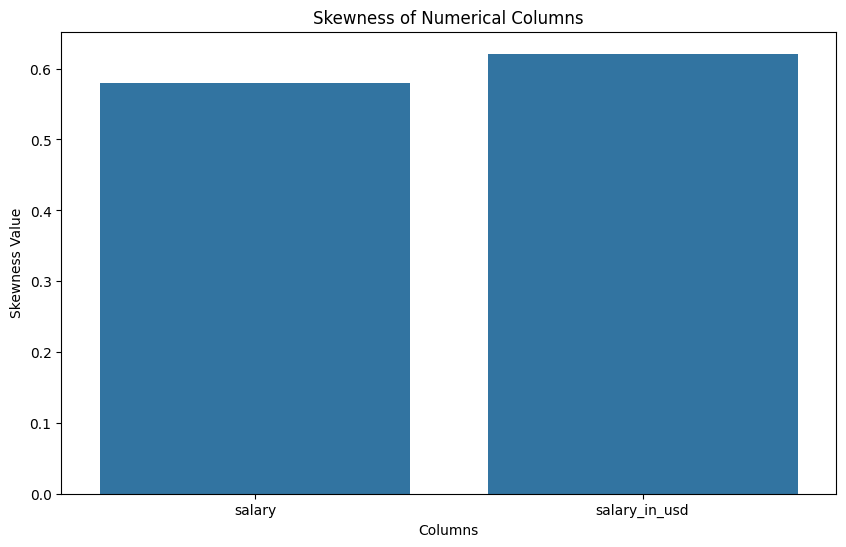

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace this with your actual DataFrame loading method
# For example: df = pd.read_csv('your_dataset.csv')

# Selecting numerical columns
numerical_columns = ['salary', 'salary_in_usd']

# Calculating skewness for numerical columns
skewness_values = df[numerical_columns].skew()

# Creating a bar plot for skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness_values.index, y=skewness_values.values)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness Value')
plt.show()


In [183]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for salary and salary_in_usd
skew_salary = skew(df['salary'])
kurtosis_salary = kurtosis(df['salary'])

skew_salary_usd = skew(df['salary_in_usd'])
kurtosis_salary_usd = kurtosis(df['salary_in_usd'])

print("Skewness and Kurtosis for salary:")
print("Skewness:", skew_salary)
print("Kurtosis:", kurtosis_salary)

print("\nSkewness and Kurtosis for salary_in_usd:")
print("Skewness:", skew_salary_usd)
print("Kurtosis:", kurtosis_salary_usd)


Skewness and Kurtosis for salary:
Skewness: 0.5790559207321095
Kurtosis: 0.46971833336148805

Skewness and Kurtosis for salary_in_usd:
Skewness: 0.6211916296018803
Kurtosis: 0.5662974027614927


In [182]:
import pandas as pd
from scipy.stats import skew, kurtosis
from tabulate import tabulate

# Define performance metrics
performance_metrics = {}

# Calculate total number of employees
total_employees = len(df)

# Calculate average salary
average_salary = df['salary'].mean()

# Calculate median salary
median_salary = df['salary'].median()

# Calculate total salary expenditure
total_salary_expenditure = df['salary'].sum()

# Calculate salary distribution by job category
salary_distribution_by_job_category = df.groupby('job_category')['salary'].mean()

# Calculate employee distribution by job category
employee_distribution_by_job_category = df['job_category'].value_counts(normalize=True)

# Calculate skewness of salary
salary_skewness = skew(df['salary'])

# Calculate kurtosis of salary
salary_kurtosis = kurtosis(df['salary'])

# Add metrics to performance matrix
performance_metrics['Total Employees'] = total_employees
performance_metrics['Average Salary'] = average_salary
performance_metrics['Median Salary'] = median_salary
performance_metrics['Total Salary Expenditure'] = total_salary_expenditure
performance_metrics['Salary Distribution by Job Category'] = salary_distribution_by_job_category
performance_metrics['Employee Distribution by Job Category'] = employee_distribution_by_job_category
performance_metrics['Skewness of Salary'] = salary_skewness
performance_metrics['Kurtosis of Salary'] = salary_kurtosis

# Convert performance matrix to DataFrame for better display
performance_matrix_df = pd.DataFrame(performance_metrics)

# Format the DataFrame with 2 decimal points
performance_matrix_df = performance_matrix_df.round(2)

# Convert the DataFrame to tabular format with borders
table = tabulate(performance_matrix_df, headers='keys', tablefmt='grid', numalign='center')

# Print the table
print(table)


+--------------------------------+-------------------+------------------+-----------------+----------------------------+---------------------------------------+-----------------------------------------+----------------------+----------------------+
|                                |  Total Employees  |  Average Salary  |  Median Salary  |  Total Salary Expenditure  |  Salary Distribution by Job Category  |  Employee Distribution by Job Category  |  Skewness of Salary  |  Kurtosis of Salary  |
+================================+===================+==================+=================+============================+=======================================+=========================================+======================+======================+
| BI and Visualization           |       9355        |      149928      |     143860      |        1.40258e+09         |                135936                 |                  0.03                   |         0.58         |         0.47         |
+---

In [181]:


# Assuming df is your DataFrame
# Replace this with your actual DataFrame loading method
# For example: df = pd.read_csv('your_dataset.csv')

# Define your categorical and numerical columns based on your dataset description
categorical_columns = [
    'work_year', 'job_title', 'job_category', 'salary_currency',
    'employee_residence', 'experience_level', 'employment_type',
    'work_setting', 'company_location', 'company_size'
]
numerical_columns = ['salary', 'salary_in_usd']

# Summary for categorical columns: count unique values
categorical_summary = df[categorical_columns].nunique().reset_index()
categorical_summary.columns = ['Variable', 'Unique Values']

# Summary for numerical columns: mean, median, std, min, max
numerical_summary = df[numerical_columns].describe().transpose().reset_index()
numerical_summary = numerical_summary[['index', 'mean', '50%', 'std', 'min', 'max']]
numerical_summary.columns = ['Variable', 'Mean', 'Median', 'Std', 'Min', 'Max']

# Combine both summaries
summary_matrix = pd.concat([categorical_summary, numerical_summary], axis=0).reset_index(drop=True)

# Display the summary matrix
print(summary_matrix)


              Variable  Unique Values           Mean    Median           Std  \
0            work_year            4.0            NaN       NaN           NaN   
1            job_title          125.0            NaN       NaN           NaN   
2         job_category           10.0            NaN       NaN           NaN   
3      salary_currency           11.0            NaN       NaN           NaN   
4   employee_residence           83.0            NaN       NaN           NaN   
5     experience_level            4.0            NaN       NaN           NaN   
6      employment_type            4.0            NaN       NaN           NaN   
7         work_setting            3.0            NaN       NaN           NaN   
8     company_location           70.0            NaN       NaN           NaN   
9         company_size            3.0            NaN       NaN           NaN   
10              salary            NaN  149927.981293  143860.0  63608.835387   
11       salary_in_usd            NaN  1

In [178]:
from tabulate import tabulate

# Create a DataFrame to hold summary statistics
summary_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max', 'Skewness', 'Kurtosis'],
    'Salary': [df['salary'].count(), df['salary'].mean(), df['salary'].std(),
               df['salary'].min(), df['salary'].quantile(0.25),
               df['salary'].median(), df['salary'].quantile(0.75),
               df['salary'].max(), skew_salary, kurtosis_salary],
    'Salary_in_USD': [df['salary_in_usd'].count(), df['salary_in_usd'].mean(), df['salary_in_usd'].std(),
                      df['salary_in_usd'].min(), df['salary_in_usd'].quantile(0.25),
                      df['salary_in_usd'].median(), df['salary_in_usd'].quantile(0.75),
                      df['salary_in_usd'].max(), skew_salary_usd, kurtosis_salary_usd]
})

# Set 'Metric' column as index
summary_stats.set_index('Metric', inplace=True)

# Format the DataFrame with 2 decimal points
summary_stats_formatted = summary_stats.round(2)

# Convert the DataFrame to tabular format with borders
table = tabulate(summary_stats_formatted, headers='keys', tablefmt='pretty', numalign='center')

# Print the table
print(table)


+----------+-----------+---------------+
|  Metric  |  Salary   | Salary_in_USD |
+----------+-----------+---------------+
|  Count   |  9355.0   |    9355.0     |
|   Mean   | 149927.98 |   150299.5    |
|   Std    | 63608.84  |   63177.37    |
|   Min    |  14000.0  |    15000.0    |
|   25%    | 105200.0  |   105700.0    |
|  Median  | 143860.0  |   143000.0    |
|   75%    | 187000.0  |   186723.0    |
|   Max    | 450000.0  |   450000.0    |
| Skewness |   0.58    |     0.62      |
| Kurtosis |   0.47    |     0.57      |
+----------+-----------+---------------+


In [177]:
summary_stats.describe()

,Salary,Salary_in_USD
count,10.000000,10.000000
mean,112295.286546,112325.605508
std,137411.557551,137319.735140
min,0.469718,0.566297
25%,10516.250000,10766.250000
50%,84404.417694,84438.686012
75%,148410.985970,148474.621673
max,450000.000000,450000.000000


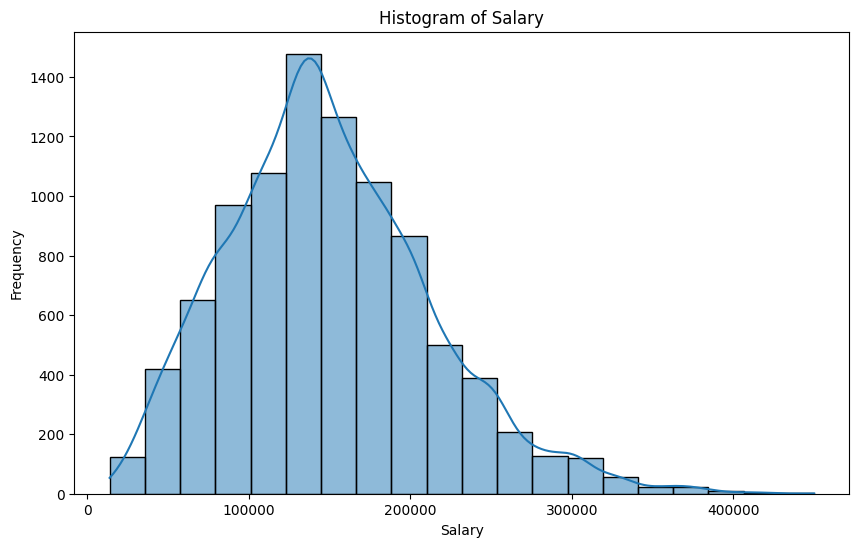

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=20, kde=True)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()



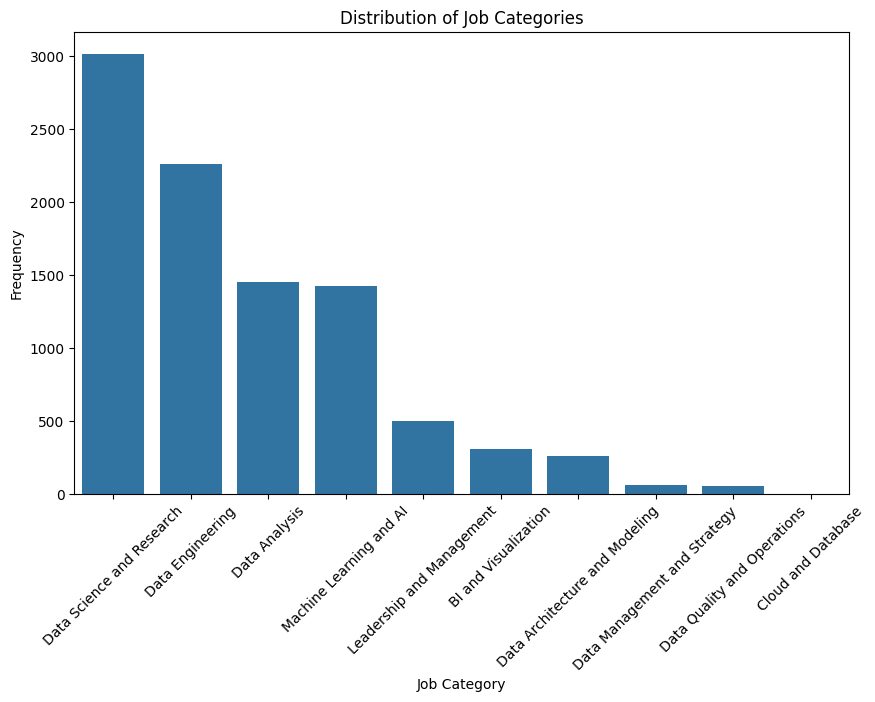

In [180]:

# Create a bar plot of job categories
plt.figure(figsize=(10, 6))
sns.countplot(x='job_category', data=df, order=df['job_category'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
columns=df.columns.to_list()

In [ ]:
for i in columns:
    print(i,"-",len(df[i].unique()))

In [ ]:
df['work_year'] = pd.to_numeric(df['work_year'])

In [ ]:
unique_years = df['work_year'].unique()

In [ ]:
unique_years

In [ ]:
df.work_year.hist()

In [ ]:
total_unique_years = len(unique_years)

print(f"Total number of unique job titles: {total_unique_years}")

In [ ]:
df_2023 = df[df['work_year'] == 2023]
df_2022 = df[df['work_year'] == 2022]
df_2021 = df[df['work_year'] == 2021]
df_2020 = df[df['work_year'] == 2020]

In [ ]:
total_records_2023 = len(df_2023)
total_records_2022 = len(df_2022)
total_records_2021 = len(df_2021)
total_records_2020 = len(df_2020)

In [ ]:
print(f"Total number of employment records in 2023: {total_records_2023}")
print(f"Total number of employment records in 2023: {total_records_2022}")
print(f"Total number of employment records in 2023: {total_records_2021}")
print(f"Total number of employment records in 2023: {total_records_2020}")

In [ ]:
unique_title = df['job_title'].unique()
unique_title

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
total_unique_titles = len(unique_title)

print(f"Total number of unique job titles: {total_unique_titles}")

In [ ]:
unique_residence = df['employee_residence'].unique()
unique_residence

In [ ]:
total_unique_residence = len(unique_residence)
print(f"Total number of unique job titles: {total_unique_residence}")

In [ ]:
unique_experience = df['experience_level'].unique()
unique_experience

In [ ]:
total_unique_experience = len(unique_experience)
print(f"Total number of unique job titles: {total_unique_experience}")

In [ ]:
unique_employement = df['employment_type'].unique()
unique_employement

In [ ]:
total_unique_employement = len(unique_employement)
print(f"Total number of unique job titles: {total_unique_employement}")

In [ ]:
unique_setting = df['work_setting'].unique()
unique_setting

In [ ]:
total_unique_setting = len(unique_setting)
print(f"Total number of unique job titles: {total_unique_setting}")

In [ ]:
unique_company_location = df['company_location'].unique()
unique_company_location

In [ ]:
total_unique_company_location = len(unique_company_location)
print(f"Total number of unique job titles: {total_unique_company_location}")